In [50]:
import gym
import gym_anytrading
from finta import TA
from gym_anytrading.envs import StocksEnv
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('BTC.csv')
df['Date']=pd.to_datetime(df['Date'])
df['Close']=df['Price'].str.replace(',','').astype(float)
df['Open']=df['Open'].str.replace(',','').astype(float)
df['High']=df['High'].str.replace(',','').astype(float)
df['Low']=df['Low'].str.replace(',','').astype(float)
df.pop('Change %')
df.pop('Price')
#df['Change %']=df['Change %'].str.replace('%','').astype(float)
df["Volume"]=df["Vol."].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(int)
df.pop('Vol.')
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-24,22916.3,23156.1,22793.1,22924.1,346360
2023-01-23,22709.0,23161.8,22527.9,22915.5,327850
2023-01-22,22775.7,23068.7,22323.0,22707.8,280640
2023-01-21,22677.5,23304.5,22461.1,22775.7,382690
2023-01-20,21074.9,22718.5,20879.3,22677.2,373740


In [55]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2023-01-24,22916.3,23156.1,22793.1,22924.1,346360,0.000000,0.000000,0.0
2023-01-23,22709.0,23161.8,22527.9,22915.5,327850,0.000000,0.000000,-327850.0
2023-01-22,22775.7,23068.7,22323.0,22707.8,280640,0.000000,0.000000,-608490.0
2023-01-21,22677.5,23304.5,22461.1,22775.7,382690,0.000000,25.318854,-225800.0
2023-01-20,21074.9,22718.5,20879.3,22677.2,373740,0.000000,18.142637,-599540.0
2023-01-19,20670.6,21169.4,20669.7,21081.2,275760,0.000000,3.051358,-875300.0
2023-01-18,21137.1,21584.1,20448.3,20670.6,388670,0.000000,2.479851,-1263970.0
2023-01-17,21184.4,21506.4,20926.2,21137.1,310040,0.000000,20.661392,-953930.0
2023-01-16,20880.1,21416.8,20698.9,21184.2,337460,0.000000,22.237765,-616470.0


In [48]:
env = gym.make('stocks-v0', df=df, frame_bound=(10, 500), window_size=10)

info: {'total_reward': 10644.000000000018, 'total_profit': 0.2169531196813652, 'position': 0}


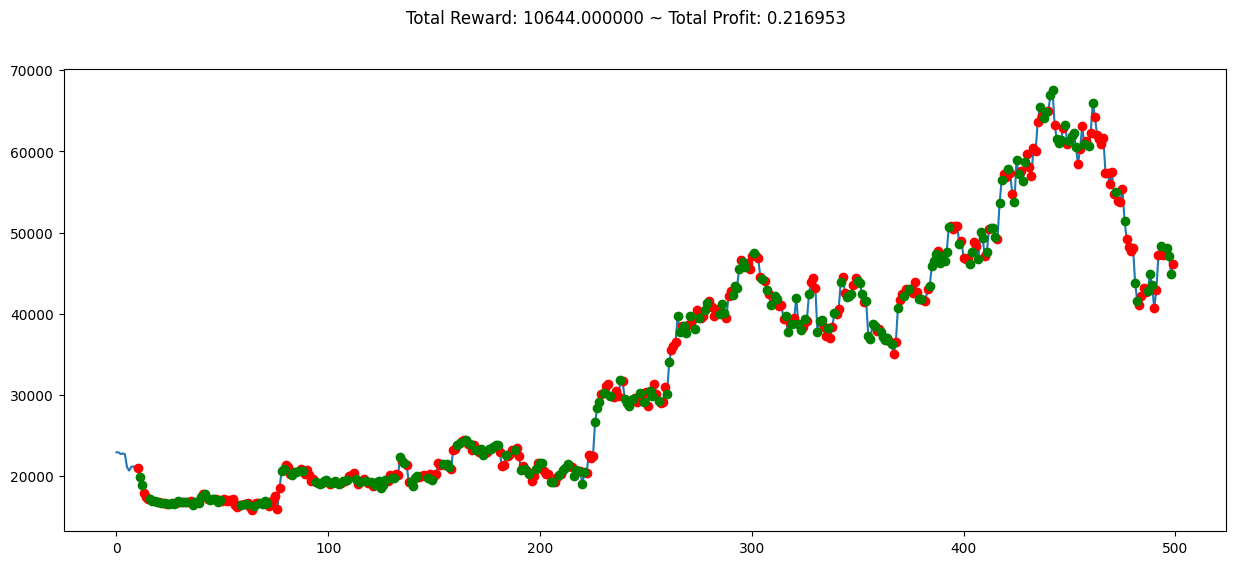

In [49]:
state=env.reset()
while True:
    action=env.action_space.sample()
    n_state, reward, done, info=env.step(action)
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [39]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 1000), window_size=5)
env=DummyVecEnv([env_maker])

In [43]:
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 99        |
|    ep_rew_mean        | -146      |
| time/                 |           |
|    fps                | 523       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | -7.76e+11 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.00677   |
|    value_loss         | 0.0559    |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 99        |
|    ep_rew_mean        | 8.74      |
| time/                 |           |
|    fps                | 523       |
|    iterations         | 200   

info: {'total_reward': 415.20000000000164, 'total_profit': 1.2996197574287456, 'position': 1}


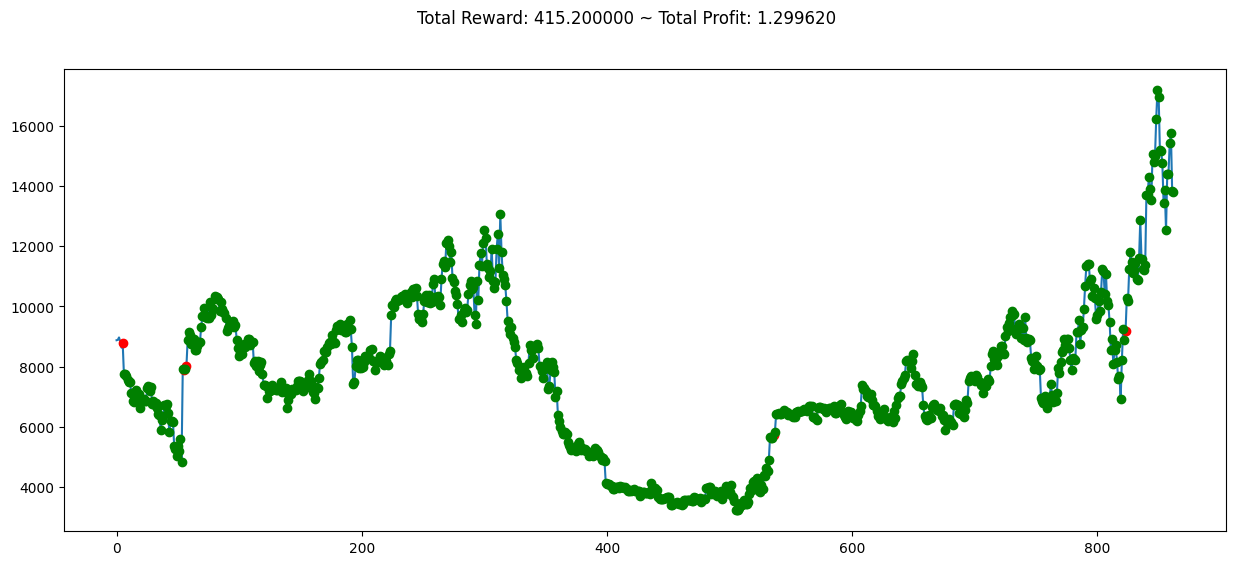

In [45]:
env = gym.make('stocks-v0', df=df, frame_bound=(1000, 2100), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs,rewards, dones, info = env.step(action)
    if dones:
        print("info:", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [56]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [78]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=5, frame_bound=(10,600))

In [79]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 554      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.653   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -551     |
|    value_loss         | 7.31e+05 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 541       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.688    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 758       |
|    valu

In [83]:
env = MyCustomEnv(df=df, window_size=5, frame_bound=(500,1300))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


info {'total_reward': -145.80000000000018, 'total_profit': 0.9654559742421348, 'position': 0}


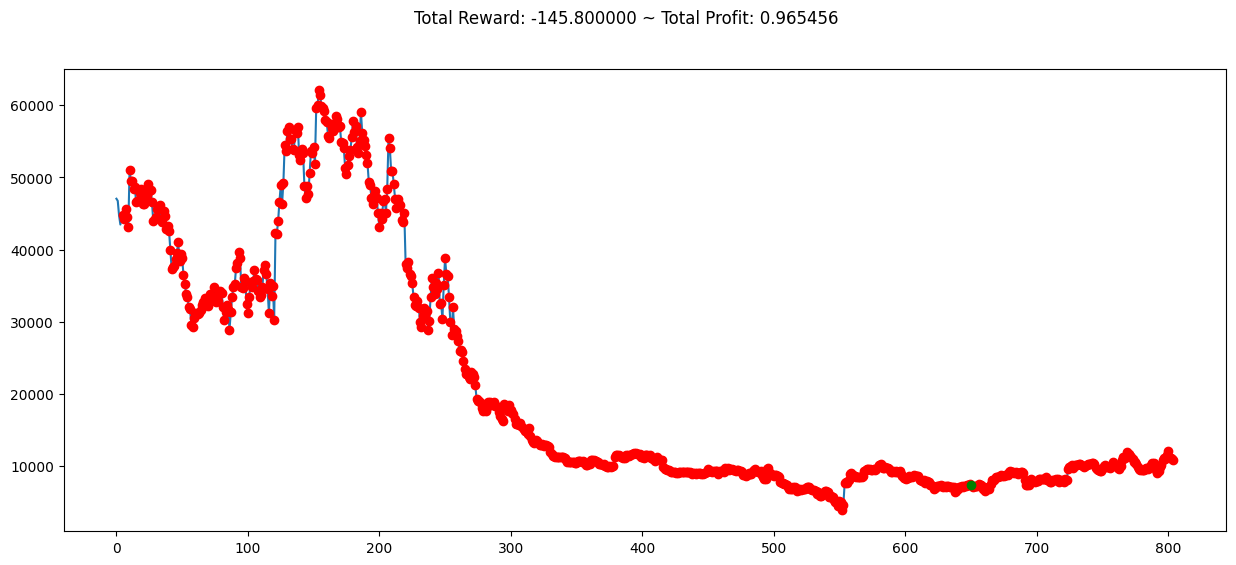

In [84]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()